In [3]:
import numpy as np
import torch
from scipy.special import softmax
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [4]:
eng_phobia = np.load("eng_phobia_test_on_sentiment")
eng_phobia_labels = np.load("eng_phobia_test_labels")

mal_phobia = np.load("mal_phobia_test_on_sentiment")
mal_phobia_labels = np.load("mal_phobia_test_labels")

eng_tam_phobia = np.load("eng_tam_phobia_test_on_sentiment")
eng_tam_phobia_labels = np.load("eng_tam_phobia_test_labels")

tam_phobia = np.load("tam_phobia_test_on_sentiment")
tam_phobia_labels = np.load("tam_phobia_test_labels")

In [5]:
def get_sentiment(data, labels):
    safe_idx = np.where(labels == 0)
    homo_idx = np.where(labels == 1)
    trans_idx = np.where(labels == 2)

    safe_sentiment = data[safe_idx]
    homophobic_sentiment = data[homo_idx]
    transphobic_sentiment = data[trans_idx]

    s_positive = safe_sentiment[:,0]
    s_negative = safe_sentiment[:,1]

    h_positive = homophobic_sentiment[:,0]
    h_negative = homophobic_sentiment[:,1]

    t_positive = transphobic_sentiment[:,0]
    t_negative = transphobic_sentiment[:,1]  
    
    return [s_positive, h_positive, t_positive, s_negative, h_negative, t_negative]

In [6]:
tam_sentiment = get_sentiment(tam_phobia, tam_phobia_labels)
eng_sentiment = get_sentiment(eng_phobia, eng_phobia_labels)
mal_sentiment = get_sentiment(mal_phobia, mal_phobia_labels)
eng_tam_sentiment = get_sentiment(eng_tam_phobia, eng_tam_phobia_labels)

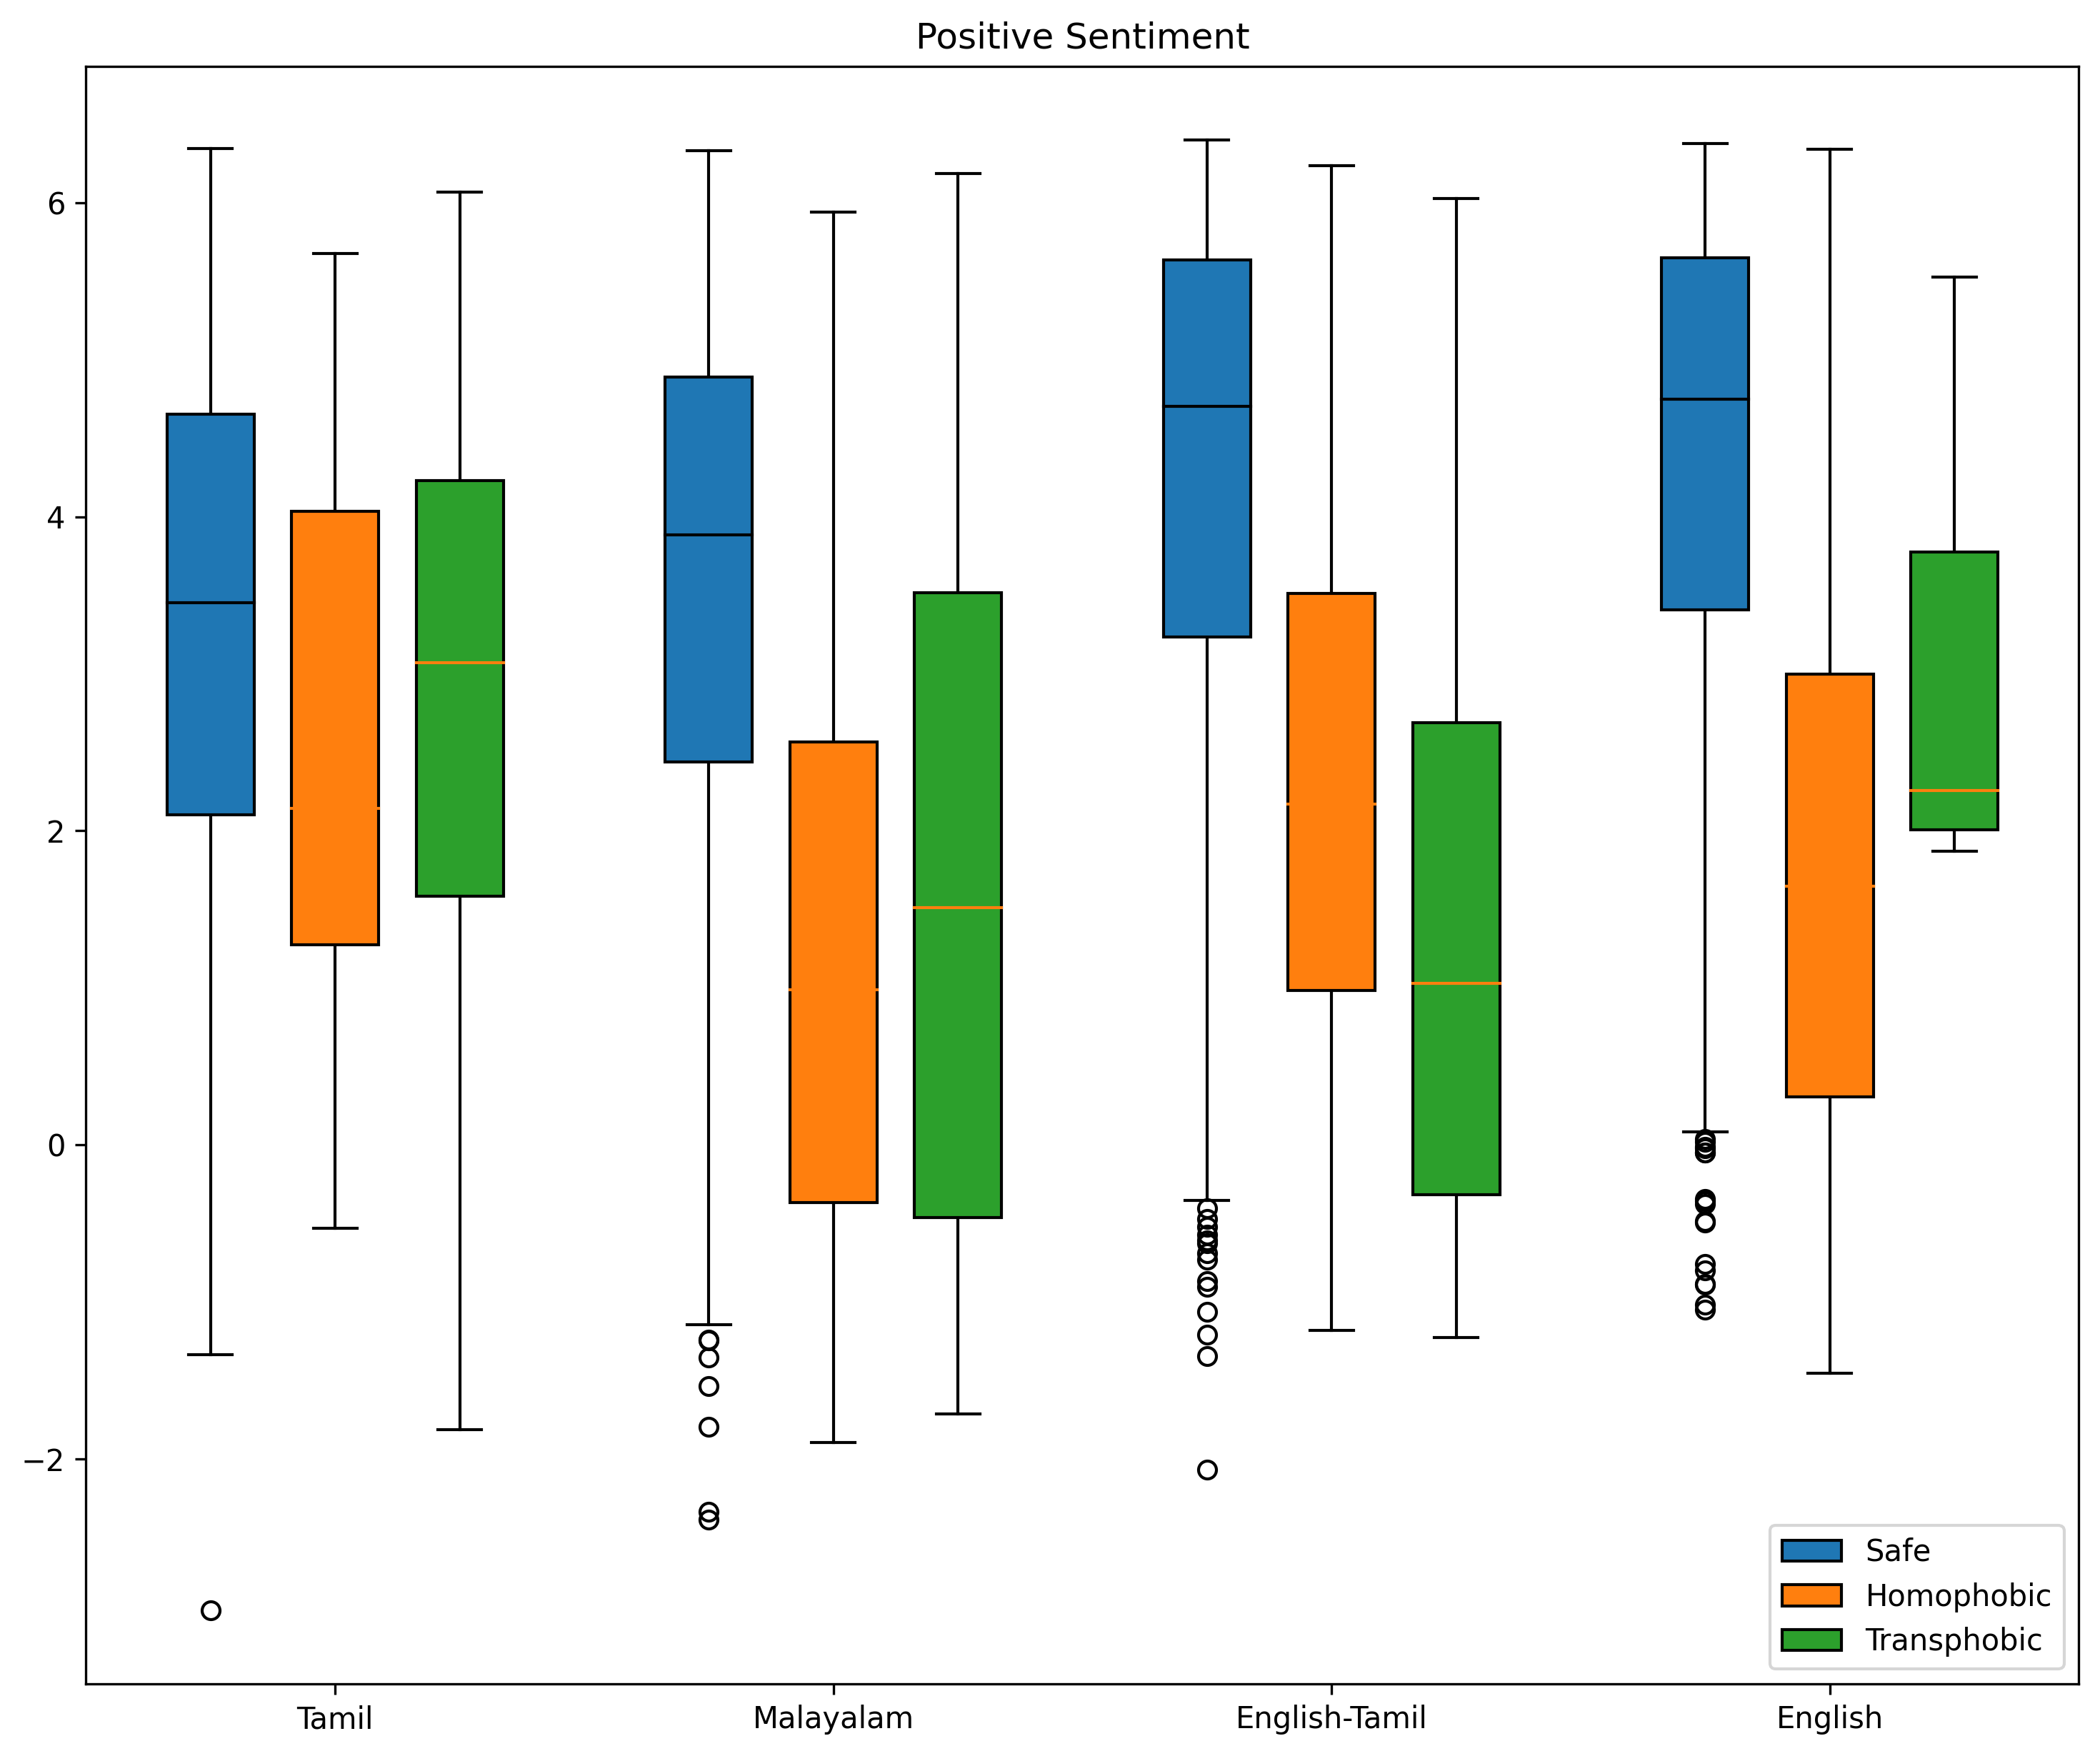

In [19]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.set_dpi(300)
fig.patch.set_facecolor('white')

safe = ax.boxplot([tam_sentiment[0], mal_sentiment[0], eng_tam_sentiment[0], eng_sentiment[0]], positions=[1, 3, 5, 7], patch_artist=True, boxprops=dict(facecolor="C0"), widths=0.35)
homophobic = ax.boxplot([tam_sentiment[1], mal_sentiment[1], eng_tam_sentiment[1], eng_sentiment[1]], positions=[1.5, 3.5, 5.5, 7.5], patch_artist=True, boxprops=dict(facecolor="C1"), widths=0.35)
transphobic = ax.boxplot([tam_sentiment[2], mal_sentiment[2], eng_tam_sentiment[2], eng_sentiment[2]], positions=[2, 4, 6, 8], patch_artist=True, boxprops=dict(facecolor="C2"), widths=0.35)

for median in safe['medians']:
    median.set_color('black')
for median in homophobic['medians']:
    median.set_color('black')
for median in transphobic['medians']:
    median.set_color('black')


plt.title('Positive Sentiment')
ax.legend([safe["boxes"][0], homophobic["boxes"][1], transphobic["boxes"][2]], ['Safe', 'Homophobic', 'Transphobic'], loc='lower right')
plt.xticks([1.5, 3.5, 5.5, 7.5], ['Tamil', 'Malayalam', "English-Tamil", "English"])
plt.show()
fig.savefig('positive_sentiment.png')

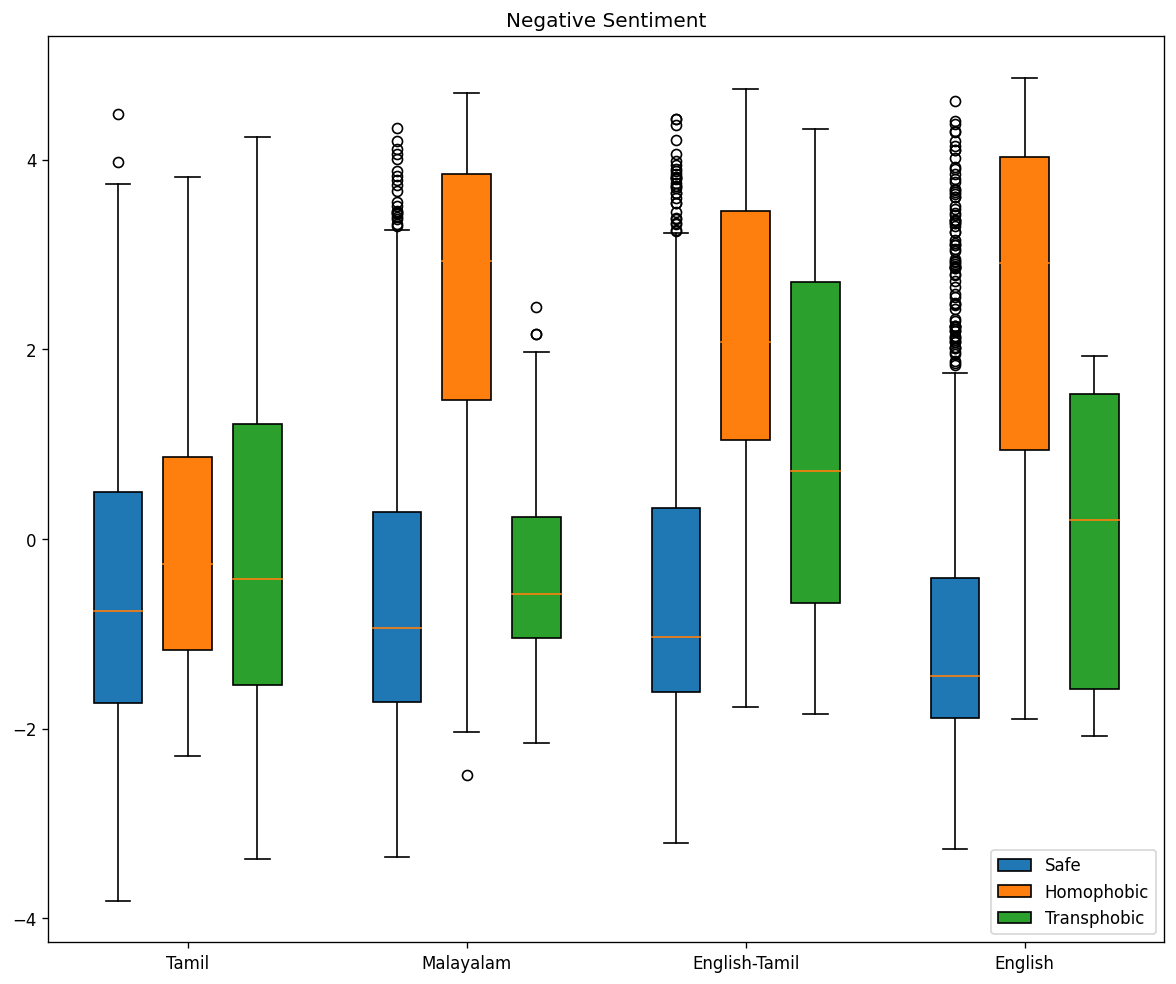

In [10]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.set_dpi(120)
fig.patch.set_facecolor('white')

safe= ax.boxplot([tam_sentiment[3], mal_sentiment[3], eng_tam_sentiment[3], eng_sentiment[3]], positions=[1, 3, 5, 7], patch_artist=True, boxprops=dict(facecolor="C0"), widths=0.35)
homophobic = ax.boxplot([tam_sentiment[4], mal_sentiment[4], eng_tam_sentiment[4], eng_sentiment[4]], positions=[1.5, 3.5, 5.5, 7.5], patch_artist=True, boxprops=dict(facecolor="C1"), widths=0.35)
transphobic = ax.boxplot([tam_sentiment[5], mal_sentiment[5], eng_tam_sentiment[5], eng_sentiment[5]], positions=[2, 4, 6, 8], patch_artist=True, boxprops=dict(facecolor="C2"), widths=0.35)

plt.title('Negative Sentiment')
ax.legend([safe["boxes"][0], homophobic["boxes"][1], transphobic["boxes"][2]], ['Safe', 'Homophobic', 'Transphobic'], loc='lower right')
plt.xticks([1.5, 3.5, 5.5, 7.5], ['Tamil', 'Malayalam', "English-Tamil", "English"])
plt.show()
fig.savefig('negative_sentiment.png')